In [1]:
import os

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
# from pandas_profiling import ProfileReport
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 100
plt.style.use("bmh")

In [3]:
os.chdir("..")

# Quickstart
1. [Import danych](#Import-danych-i-podstawowe-informacje-o-zbiorze)
2. [Wykresy](#Wykresy-i-wnioski-przyblizajace-zbior-danych)
3. [Potencjalne pytania](#Pytania,-ktore-moga-potencjalnie-naprowadzic-na-cechy,-ktore-maja-wieksze-znaczenie-dla-predykcji-targetu)
4. [Key takeaways](#Key-takeaways)

# Import danych i podstawowe informacje o zbiorze

In [4]:
df = pd.read_csv("data/bank-additional-full.csv", sep=";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [10]:
df = df.rename(columns={"y": "target"})
df["target"] = df.target.map({"yes": 1, "no": 0})
df = df.astype({"target": "int0"})

#  Wykresy i wnioski przyblizajace zbior danych

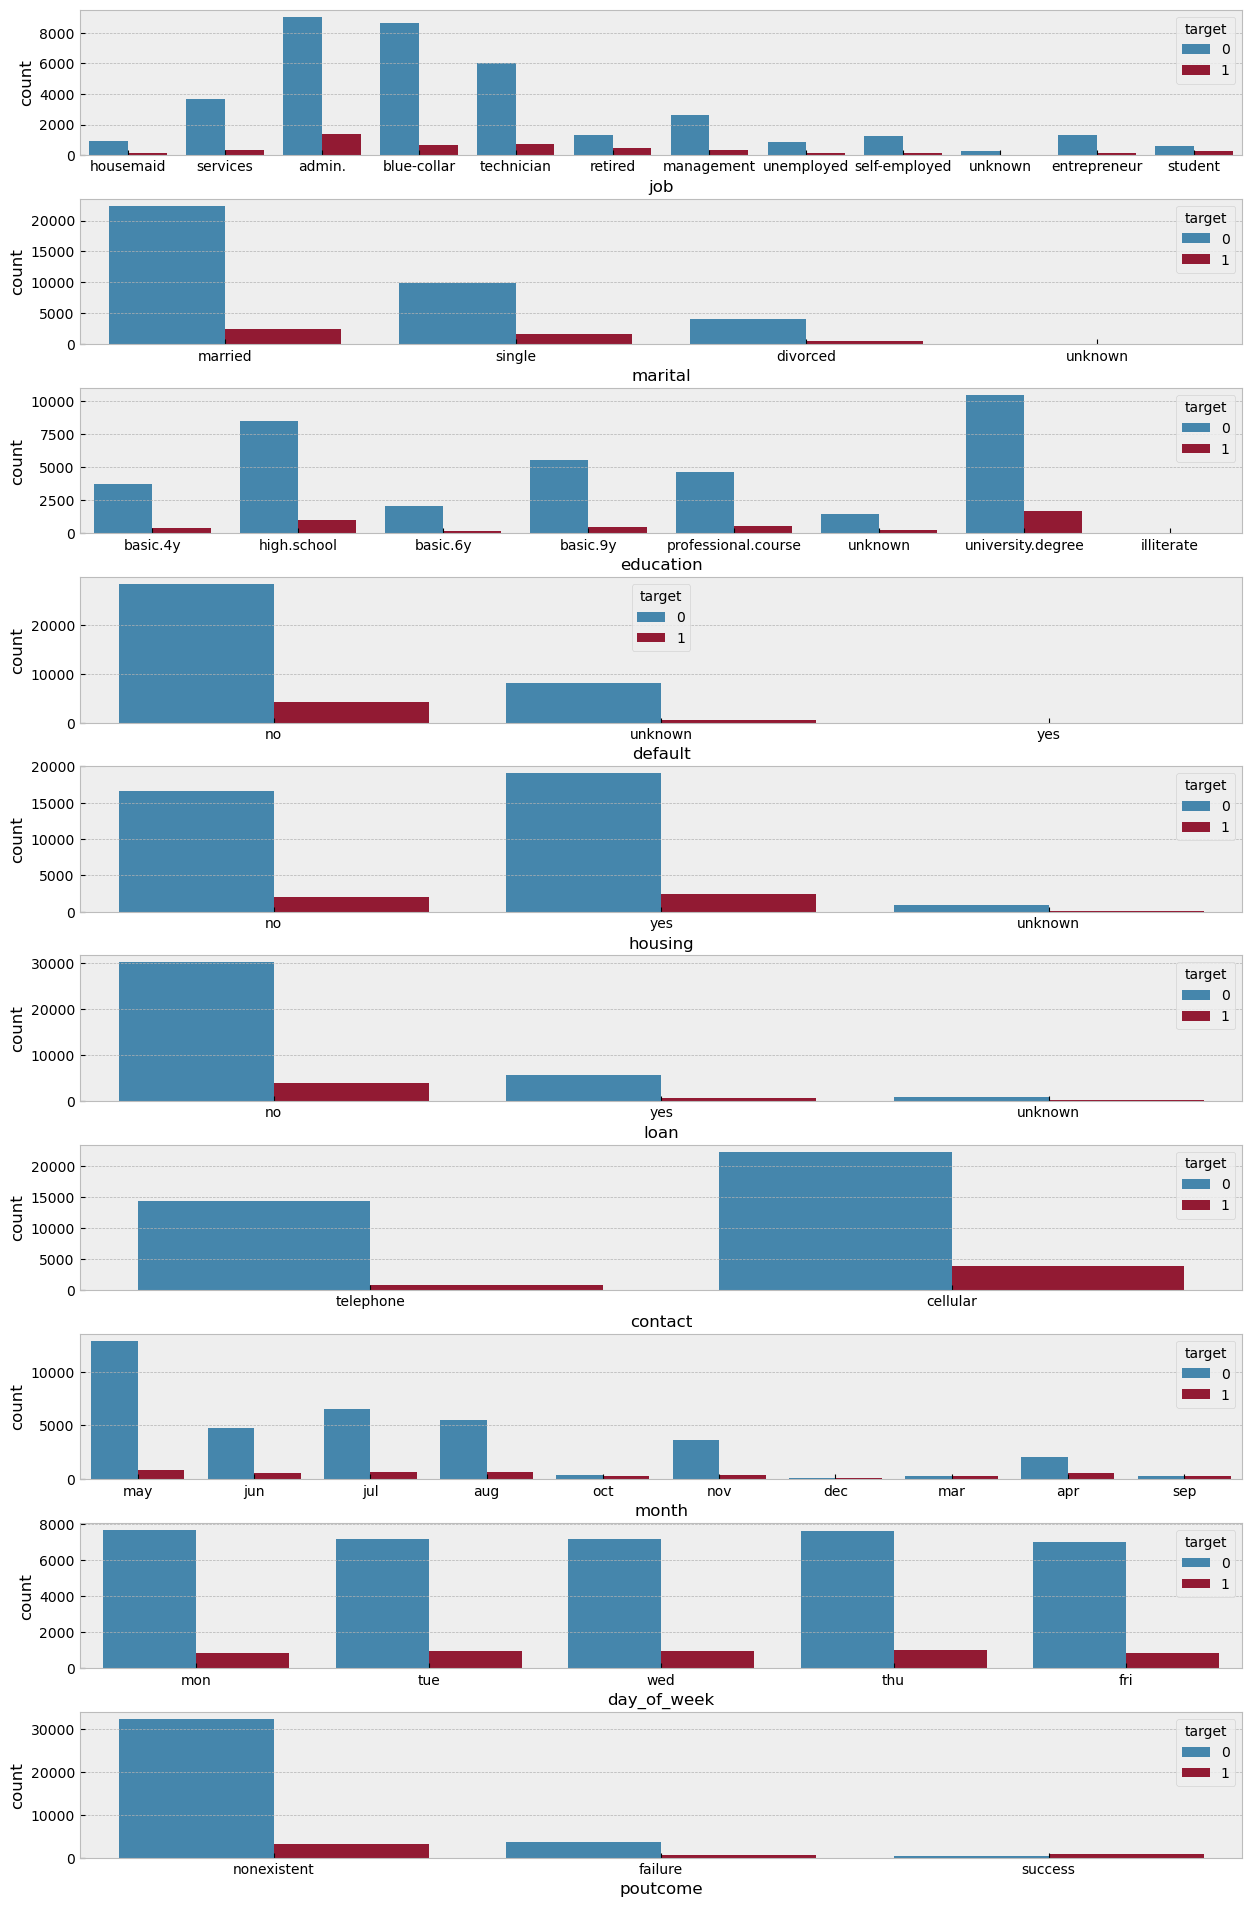

In [11]:
fig, axs = plt.subplots(10, figsize=(15, 24))

for ind, feature in enumerate(df.select_dtypes("object")):
    sns.countplot(data=df, x=feature, hue="target", ax=axs[ind])

plt.subplots_adjust(hspace=0.3)

### Wnioski
- Najwiecej rozmow przeprowadza sie w okresie letnim.
- Znaczna wiekszosc osob juz bralo wlasna pozyczke.
- Podobna ilosc osob maja do splacenia kredyt mieszkaniowy, do osob ktore takowego kredytu nie posiadaja w ogole.
- Pomijalna ilosc osob, ktore maja do splacenia wlasny kredyt.
- Wiekszosc osob ma wyksztalcenie wyzsze, lub srednie.
- Wiecej niz polowa osob jest zareczona. Co wazniejsze, porownujac target dla osob, bedacych singlami, do osob bedacych zareczonych, to mimo ze singli jest dwa razy mniej, to ilosc osob, dla ktorych _target_ jest rowny __1__, jest podobna.
- Znaczna wiekszosc osob ze zbioru danych to; _technician_, _admin_, lub _blue collar_.

#### Kolumna _Day of week_ jest bezuzyteczna, gdyz dystrybucja obserwacji jest taka sama miedzy roznymi wartosciami w tym polu

In [12]:
df = df.drop("day_of_week", axis=1)

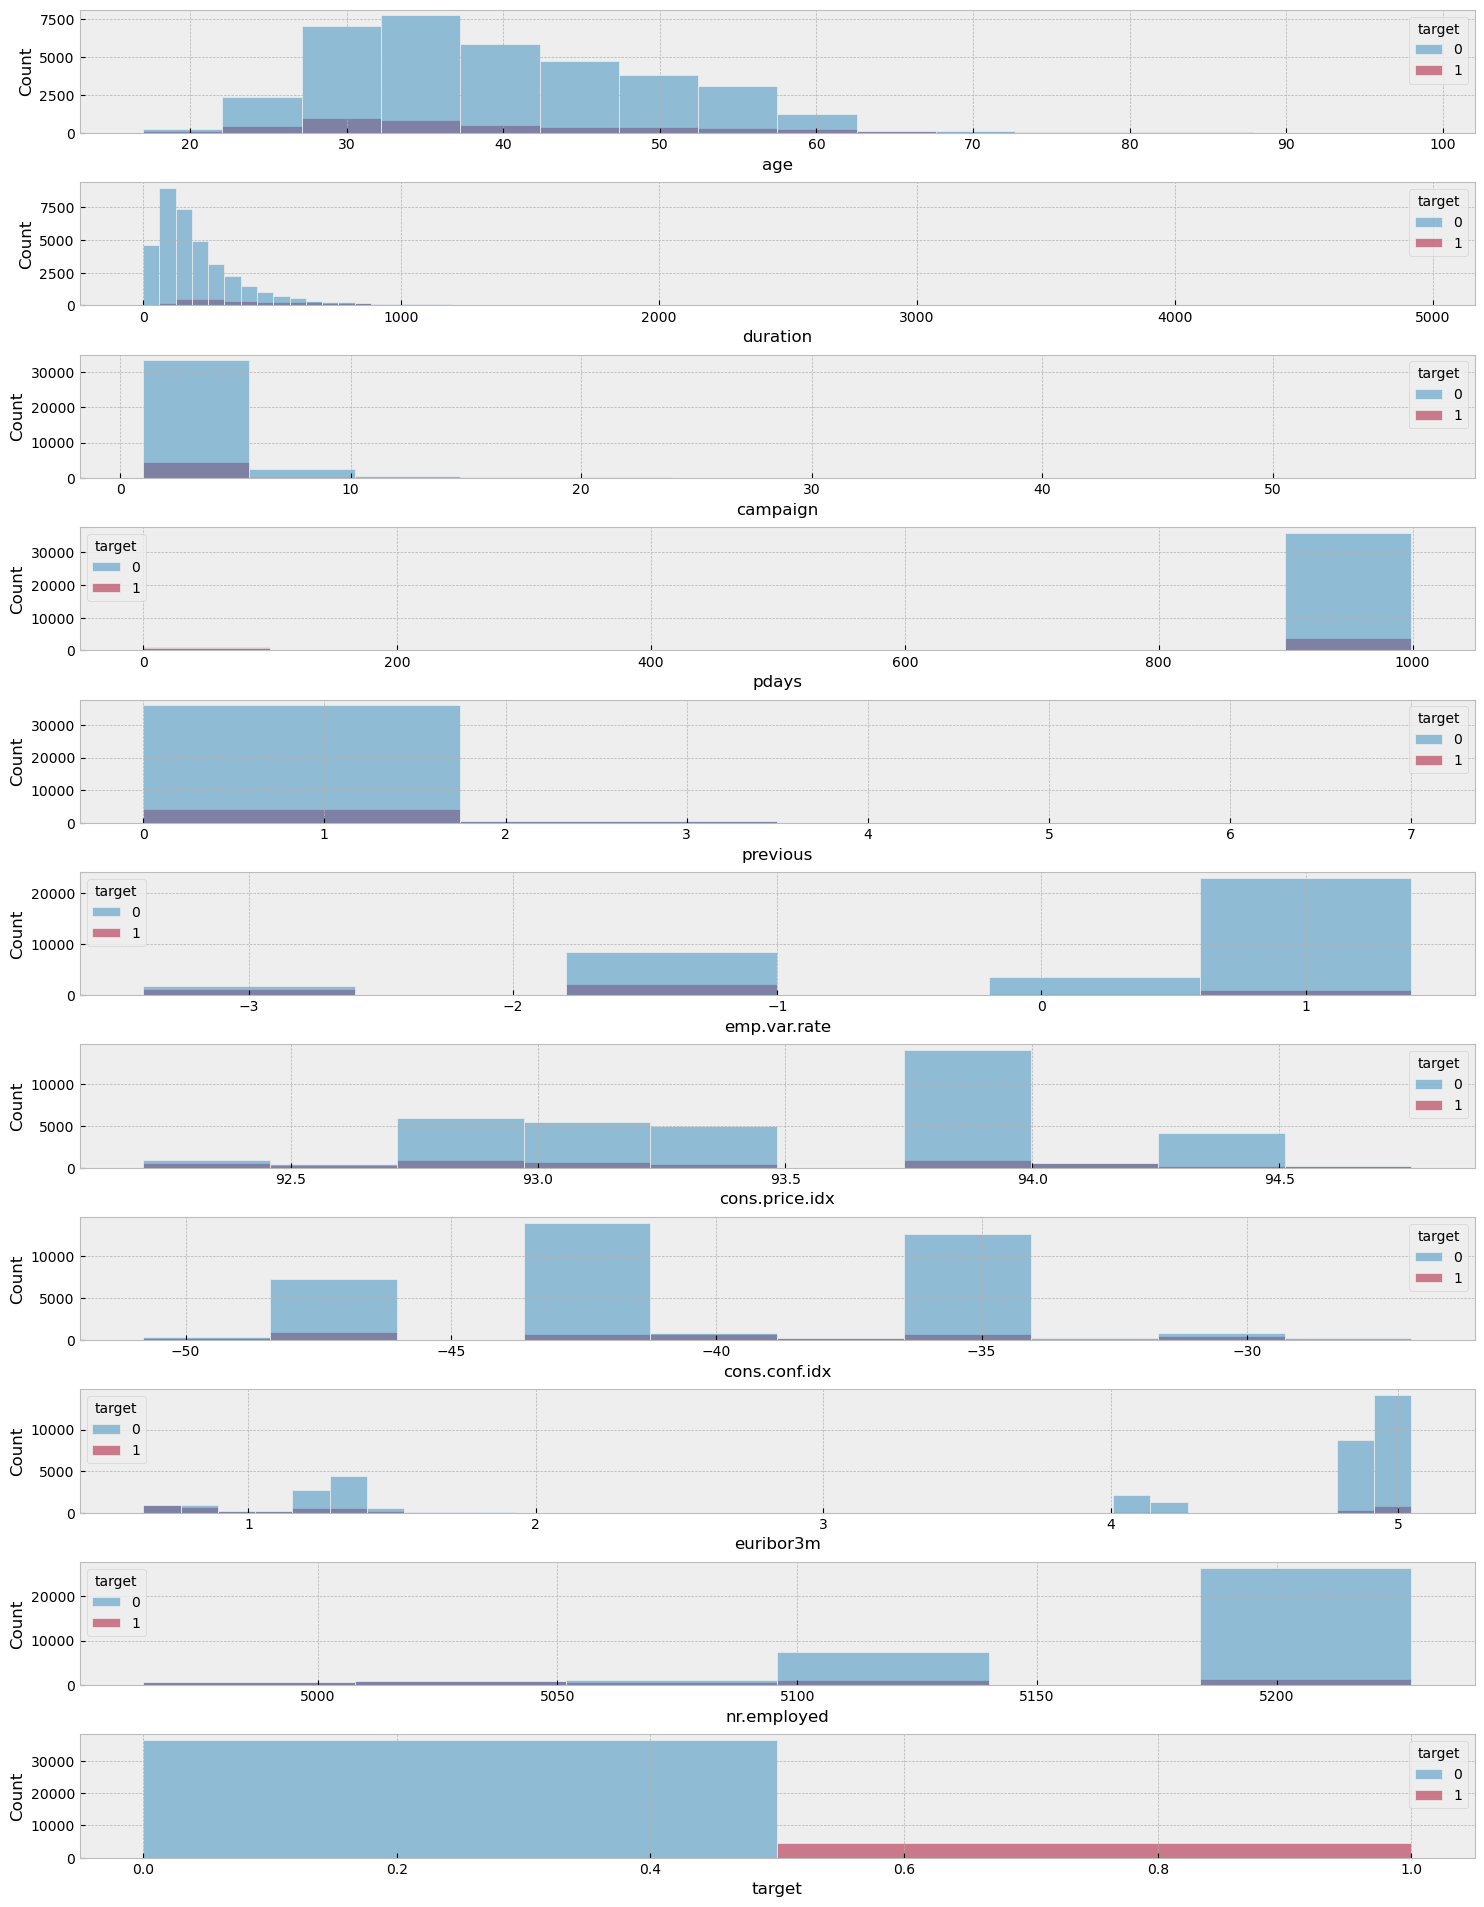

In [13]:
fig, axs = plt.subplots(11, figsize=(18, 24))

for ind, feature in enumerate(df.select_dtypes(exclude="object")):
    sns.histplot(
        data=df,
        x=feature,
        hue="target",
        ax=axs[ind],
        bins=(2 * int(np.sqrt(df[feature].nunique()))),
    )

plt.subplots_adjust(hspace=0.4)

### Wnioski
- tu
- wypisz
- wnioski
- dla obserwacji, ktore moga miec znaczenie

<Figure size 2400x1800 with 0 Axes>

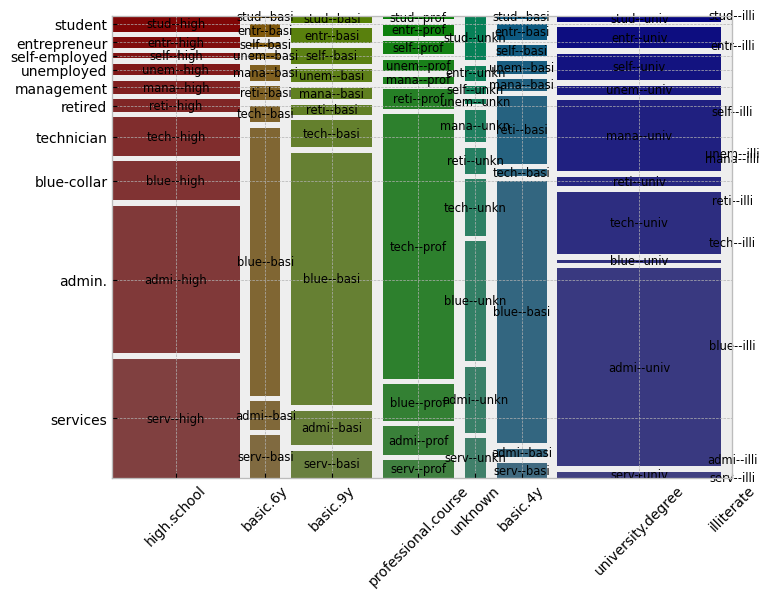

In [14]:
plt.figure(
    dpi=300,
)
subset = df[~df["education"].isin(["unknown", "illiterate"])]
subset = df[~df["job"].isin(["unknown", "housemaid"])]
mosaic(
    subset,
    ["education", "job"],
    labelizer=lambda x: "" + x[1][:4] + "--" + x[0][:4],
    label_rotation=[45, 0],
    gap=0.02,
)
plt.show()

In [55]:
subset = pd.crosstab([df.education, df.job], df.target)
subset.xs(('university.degree'), level='education').T[['admin.','technician','management']]

job,admin.,technician,management
target,,,
0,4928,1584,1806
1,822,225,257


In [56]:
subset = pd.crosstab([df.education, df.job], df.target)
subset.xs(('high.school'), level='education').T[['admin.','services']]

job,admin.,services
target,,
0,2947,2477
1,382,203


#### Wnioski
- Tutaj tylko mozna zobrazowac ilosc konkretnych grup, wiec mozna napisac jakie grupy sa najliczniejsze
- dla tych yez grup nalezaloby zapewne zrobic plot, ktory pokazuje ze np. osob bedacych _adminem_ o wyksztalceniu 
- wyzszym, jest tyle osob, co skusilo sie na depozyt, a tyle sie nei skusilo, zrobic tak dla __3__ grup i bajka
- mozesz to zrobic crosstabem (pd.crosstab)

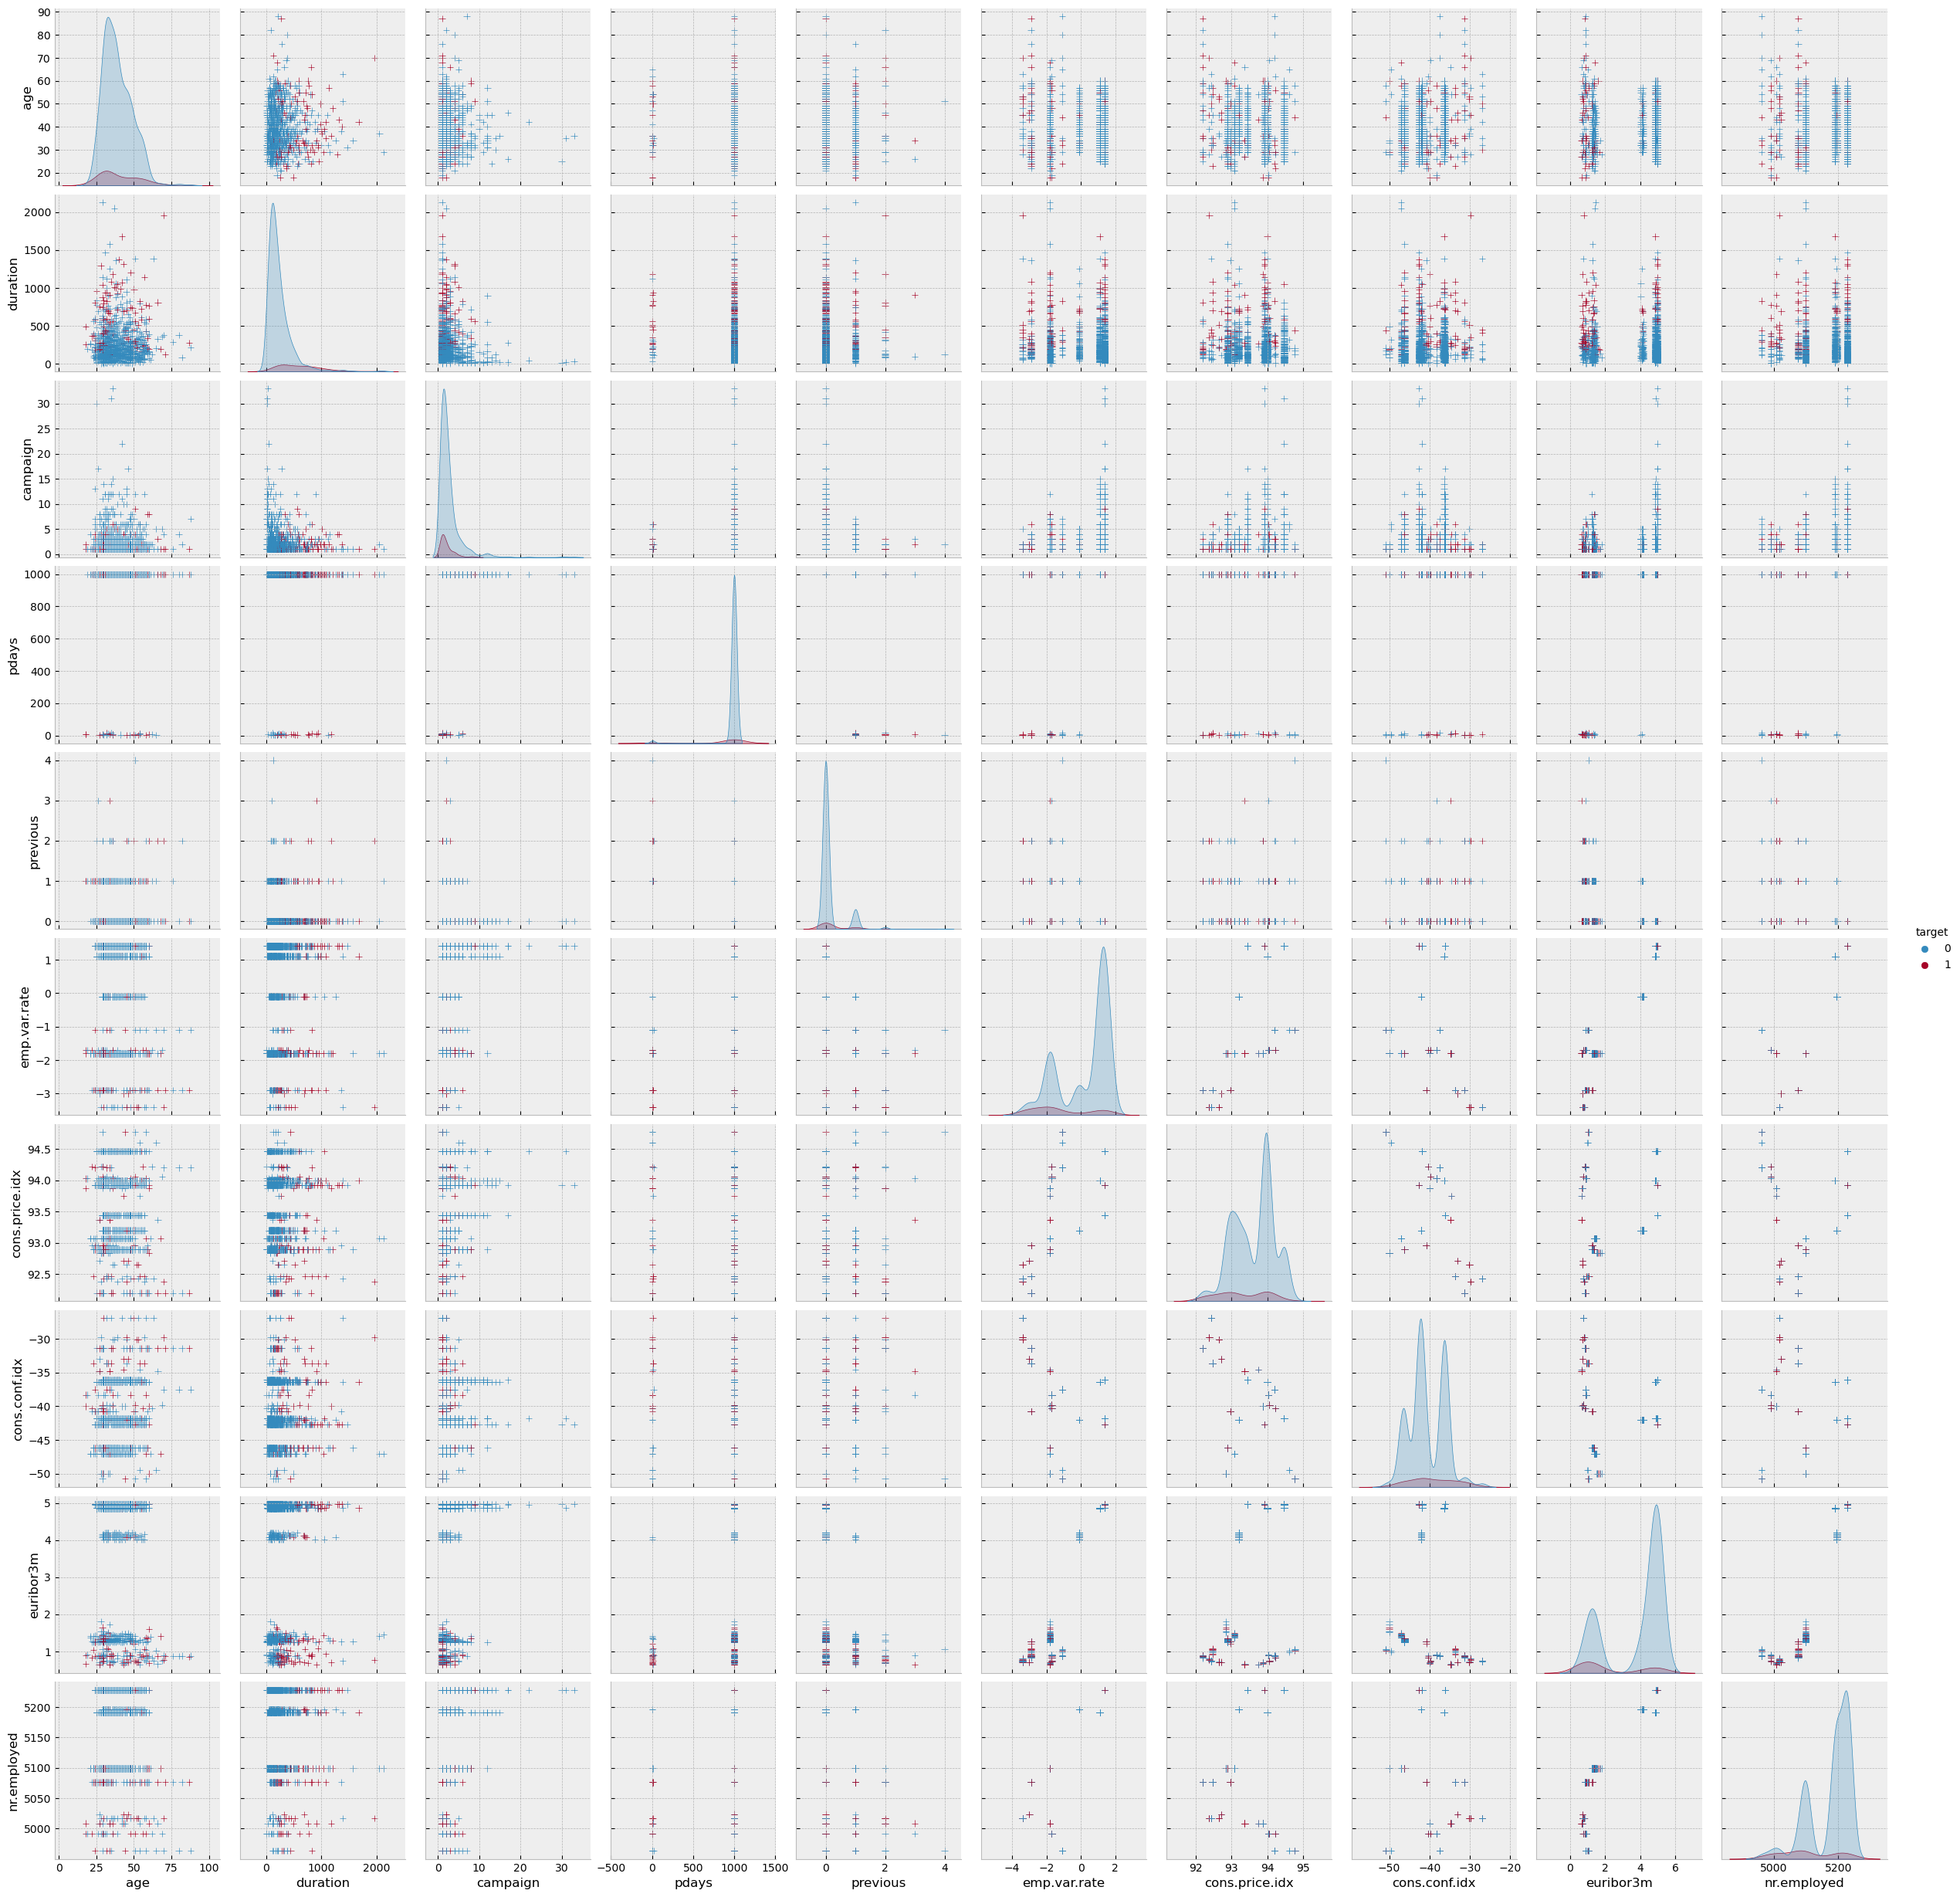

In [15]:
sns.pairplot(
    df.sample(1000).select_dtypes(exclude="object"),
    hue="target",
    markers="+",
    diag_kind="kde",
)

#### Wnioski
- tu wnioski
- dla tych par, ktore maja jakis ciekawy rozklad

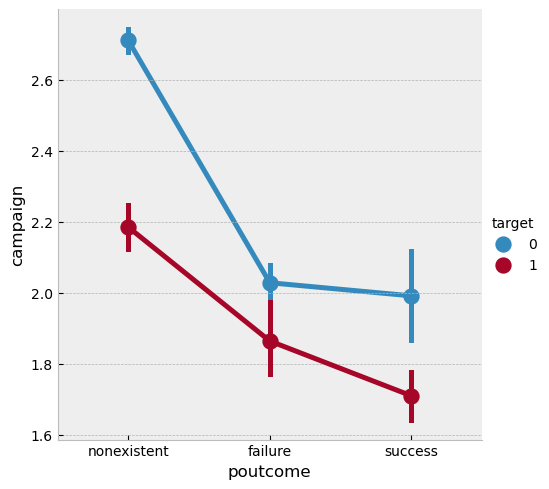

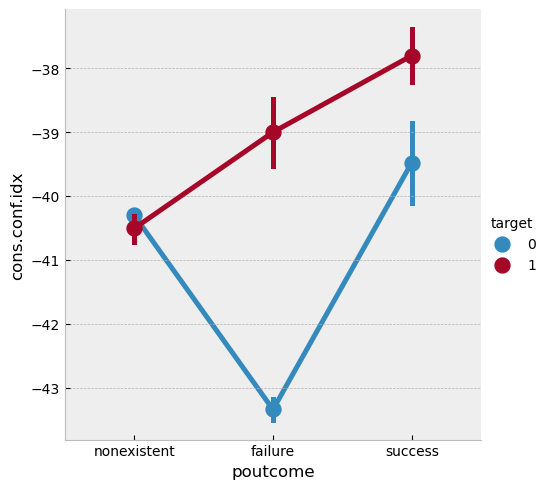

In [16]:
sns.catplot(
    hue="target",
    x="poutcome",
    y="campaign",
    kind="point",
    data=df,
)
sns.catplot(
    hue="target",
    x="poutcome",
    y="cons.conf.idx",
    kind="point",
    data=df,
)

### Wnioski
- tu wnioski

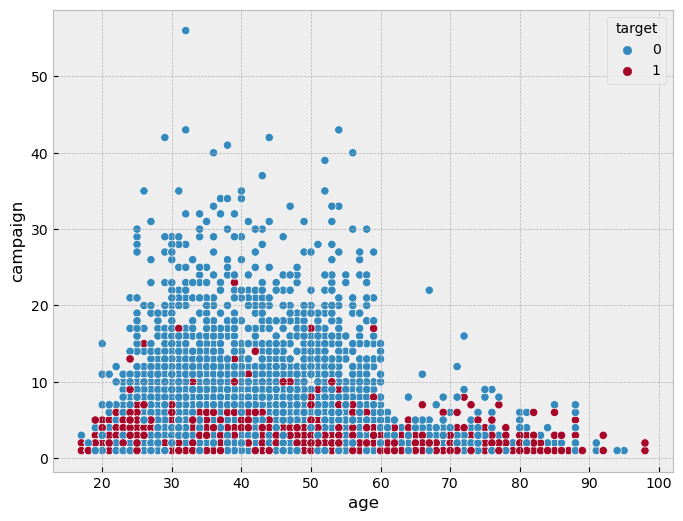

In [17]:
sns.scatterplot(data=df, x="age", y="campaign", hue="target");

### Wnioski
- tu wnioski

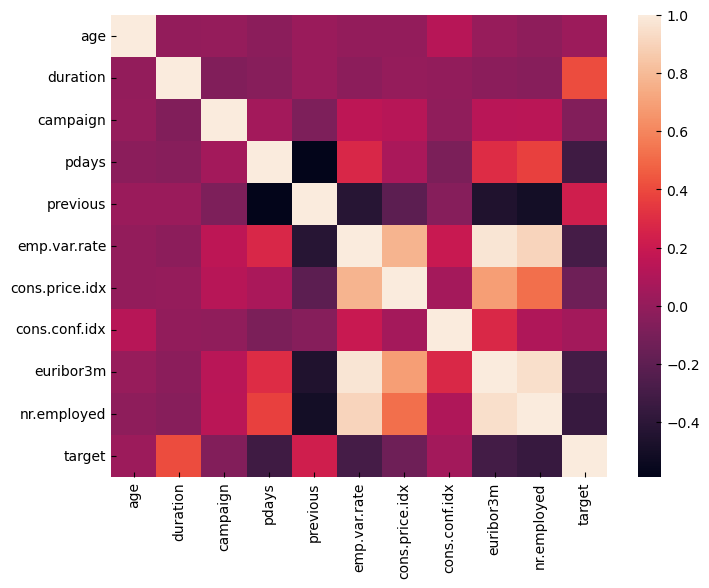

In [18]:
sns.heatmap(
    data=df.select_dtypes(exclude="object").corr(),
);

#### Wnioski
- Silna korelacja cechy _duration_ z _target'em_
- Warto zwrocic uwage na silna korelacje miedzy wartosciami z grupy cech _social and economic context attributes_.
- Wzglednie silna korelacja miedzy _pdays_, a cechami _nr\_employed_, oraz silnie ujemna z _previous_.

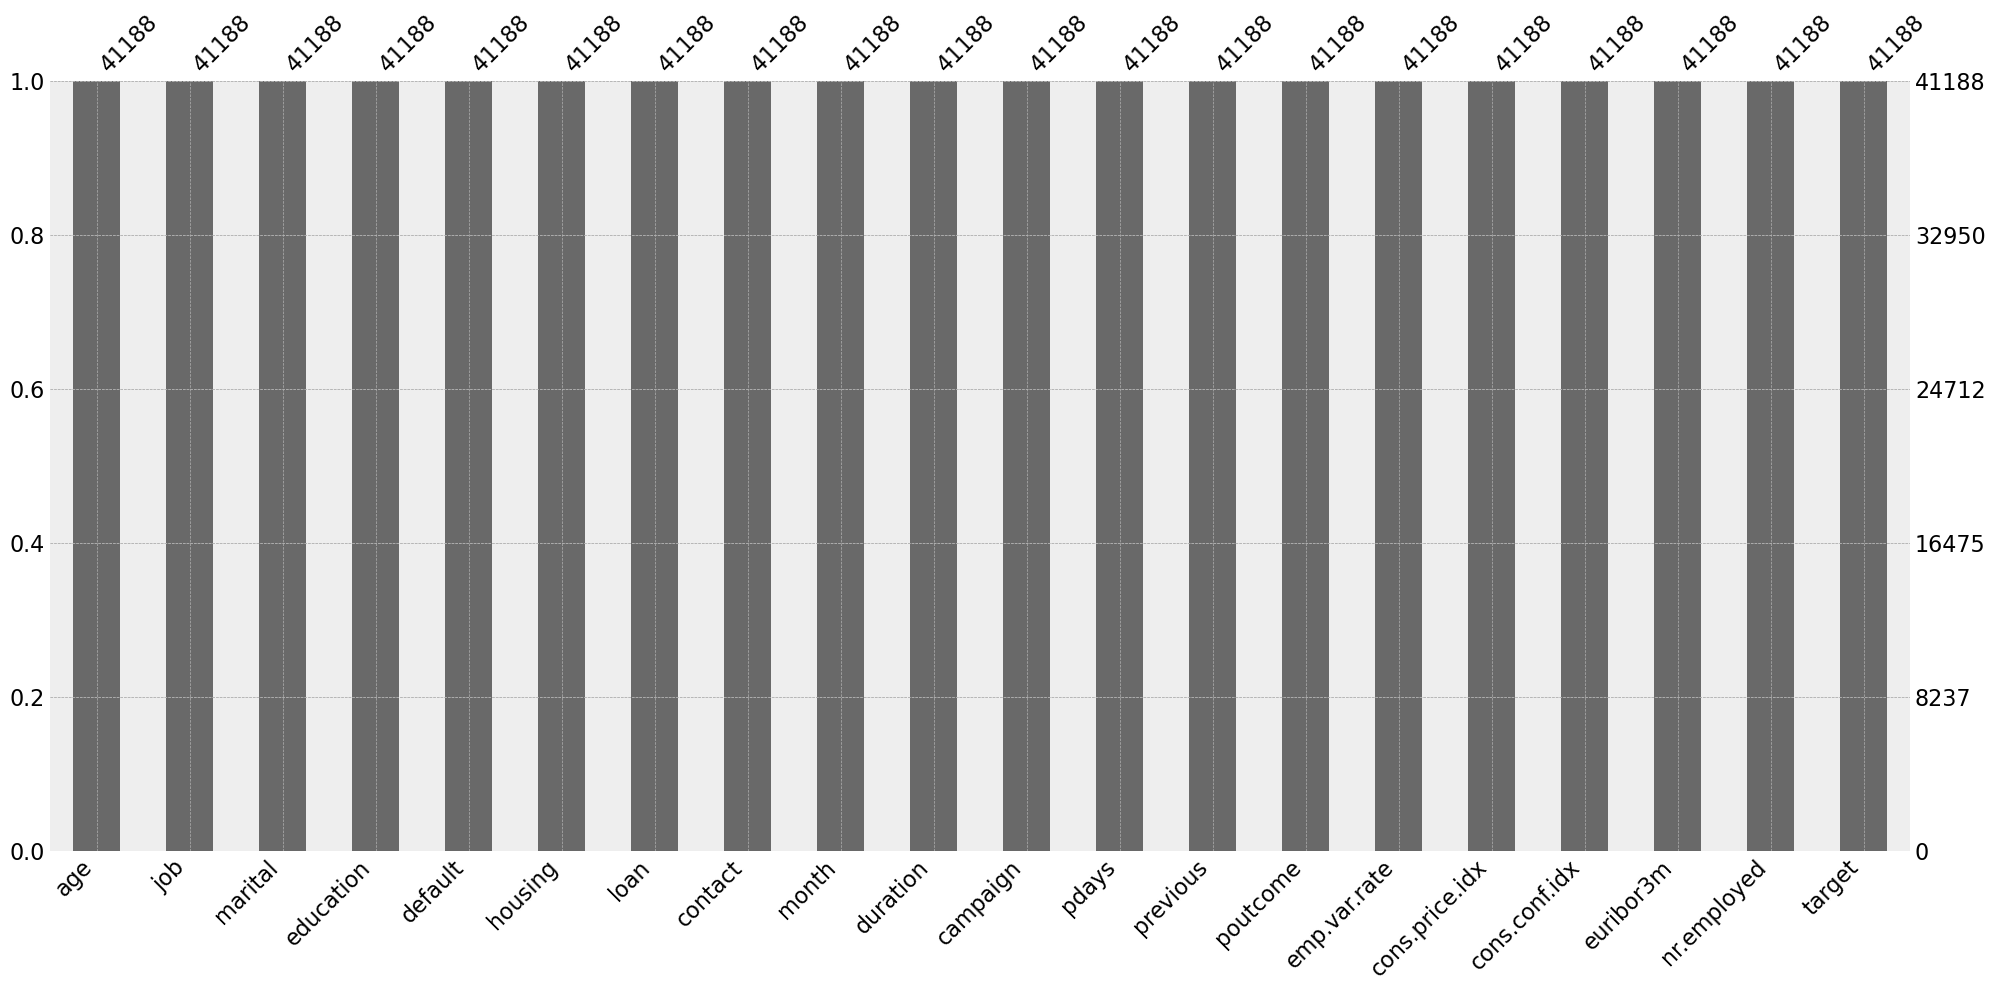

In [19]:
msno.bar(df);

#### Wnioski
Zbior danych, nie zawiera zadnych brakow.

#### Usuniecie wierszy zduplikowanych, czyli bedacych powtorzeniem wiersza, ktory wczesniej juz wystapil (te, nie sa brane pod uwage.

In [20]:
df = df.loc[~df.duplicated()]

In [21]:
pr = ProfileReport(df)

NameError: name 'ProfileReport' is not defined

##### Profile Report report jako widget (odkomentowac komorke ponizej)

In [ ]:
# pr.to_widgets()

# Pytania, ktore moga potencjalnie naprowadzic na cechy, ktore maja wieksze znaczenie dla predykcji targetu
- Zbior danych zawiera wiele kolumn bedacych tekstem. Z tego tez powodu, nalezy pochylic sie nad procesem zamiany tekstu na wartosci liczbowe za pomoca roznego typu procesow _encoding_.
- Czy kolumny zwiazane z _social and economic context attributes_ maja faktyczne znaczenie dla predykcji? Sa bowiem one zmienne w okresach kwartalnych/miesiecznych i sa niezmienne dla pewnej grupy obserwacji.
- Kolumny z wczesniej wymienionej kategorii moga miec duze znaczenie dla zbioru danych, gdyz wskazuja na stopien zatrudnienia w kraju i stope procentowa, a ta moze miec ogromne znaczenie dla checi klientow do depozytu. Sa to bardzo wazne wspolczynniki, gdyz pozwola uogolnic model, do jego szerszego przystosowania.

# Key takeaways
- Trzeba pamietac, ze _unknown_ mozna uznac za klase, lub zmapowac jako pd.NA, bo nie znamy tej wartosci. Warto przyjrzec sie poszczegolnym cechom, w ktorej mozna zaobserwowac obiekty o wartosci cech _unknown_ i sprobowac aproksymowac wartosc tej cechy, na podstawie grupy obiektow, lub tez wyrzucic te obiekty, ktore maja ceche _unknown_, jesli ilosc jej obserwacji jest znikoma na tle calego zbioru danych.
- Warto zmapowac kolumny yes/no/unkown na 1/0/-1
- wartosc __999__ w kolumnie _pdays_ oznacza, ze nie kontaktowano sie z dana osoba
- kolumna _duration_, nie powinna pod zadnym pozorem zostac uzyta do trenowania modelu, a jedynie jego walidacji
- Wskaznik _Euribor_ to srednia arytmetyczna wiborow (stop procentowych,  podawanych przez banki UE 

In [ ]:
dict_eng_to_pl = {
    "y": "target",
    "emp.var.rate": "wsk_zmien_zatrudnienia",
    "cons.price.idx": "wsk_cen_konsum",
    "cons.conf.idx": "wsk_zauf_konsum",
    "nr.employed": "liczba_pracownikow",
    "age": "wiek",
    "job": "zawod",
    "marital": "stan_cywilny",
    "education": "wyksztalcenie",
    "default": "ma_kredyt",
    "housing": "kredyt_mieszkaniowy",
    "loan": "ma_pozyczke",
    "contact": "sposob_kontaktu",
    "month": "miesiac",
    "campaign": "liczba_polaczen_aktualnej_kampanii",
    "pdays": "liczba_dni_od_ost_kontaktu",
    "previous": "liczba_polaczen_przed_aktualna_kampania",
    "poutcome": "wynik_poprzedniej_kampanii",
    "duration": "dl_polaczenia",
}
df = df.rename(columns=dict_eng_to_pl)

In [ ]:
df.to_csv("data/precleaned.csv")